In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx

In [3]:
## Load necessary data
G = pickle.load(open('data/revised_cleaning_results/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
paths = pickle.load(open("data/revised_cleaning_results/paths_ship_specific_routes.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

In [4]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
 

# add degree to dataframes
df_links['degree_source'] = df_links.source.apply(lambda x: G.degree[x])
df_links['degree_target'] = df_links.source.apply(lambda x: G.degree[x])
df_nodes['degree'] = G.degree
df_nodes['degree'] = df_nodes.degree.apply(lambda x: x[1])

In [5]:
nodes_to_keep = df_nodes.loc[(df_nodes.degree!=2)|(df_nodes.n.isin(harbour_nodes))]

In [6]:
keep = list(nodes_to_keep.n)

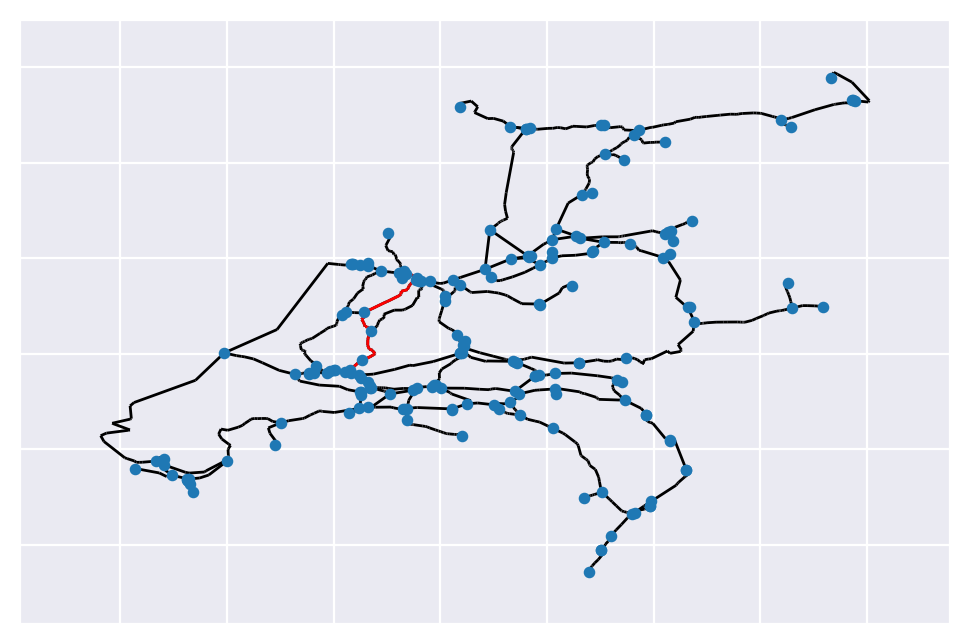

In [7]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, keep, node_size=10)
H = G.subgraph(paths[('NLRTM', 'NLAMS', 0)])
nx.draw_networkx_edges(H, pos_dict, edge_color='r')

In [8]:
new_edges = []
for key, route in paths.items():
    print(key)
    print(route)
    new_route = []
    for node in route:
        if node in keep:
            new_route.append(node)
    print(new_route)
    sub_routes = {i:[] for i in range(len(new_route)-1)}
    r = 0

    for i, node in enumerate(route):
        sub_routes[r].append(node)
        if (node in keep) and (i>0) and (node != route[-1]):
            sub_routes[r+1].append(node)
            r+=1
    for sub_route in sub_routes.values():
        paths[key] = sub_route
        path_length = 0
        print(sub_route)
        if len(sub_route) > 2:
            path_length = 0
            for j in range(len(sub_route)-1):
                path_length += nx.dijkstra_path_length(G, sub_route[j], sub_route[j+1], weight='length_m')
            new_edges.append((sub_route[0], sub_route[-1], path_length))
        else:
            path_length += nx.dijkstra_path_length(G, sub_route[0], sub_route[1], weight='length_m')
            new_edges.append((sub_route[0], sub_route[-1], path_length))
    # for i in range(len(new_route)-1):
    #     new_edges.append((new_route[i],new_route[i+1],path_l))


('NLRTM', 'NLAMS', 0)
['8863306', '8864009', '8866439', '8861193', 'B4308_B', 'B4308_A', '8861191', '8867588', '8863742', '8867374', 'B4913_B', 'B4913_A', 'L24895_B', 'L24895_A', '8864798', '8867538', '8867549', '8860860', '8868116', '8865170', '8866907', 'B23943_B', 'B23943_A', 'L7804_B', 'L7804_A', 'B57545_B', 'B57545_A', '8865214', 'B32055_B', 'B32055_A', 'B18202_B', 'B18202_A', 'B51737_B', 'B51737_A', 'B17709784_B', 'B17709784_A', 'B19102_B', 'B19102_A', 'B46036_B', 'B46036_A', '30985789', '8866363', 'B46356_B', 'B46356_A', 'B26151_B', 'S58510_A', 'B26151_A', '8863360', 'B26963_A', 'B26963_B', 'B3446_A', 'B3446_B', 'B41042_A', 'B41042_B', 'B33731_A', 'B33731_B', '8862496', 'B27700_B', 'B27700_A', 'S46906_B', 'S46906_A', 'B50163_B', 'B50163_A', '8860982', '8867583', '8865263', '8865954', 'S20232_B', 'S20232_A', '8861413', '8862716', 'S45168_B', 'S45168_A', 'B25728_B', 'B25728_A', 'S47428_B', 'S47428_A', 'B50505_B', 'B50505_A', 'B10908_B', 'B10908_A', 'B56925_B', 'B56925_A', 'B7755_B

In [9]:
G = G.subgraph(keep)
G = nx.Graph(G)
G.add_weighted_edges_from(new_edges,'length_m')

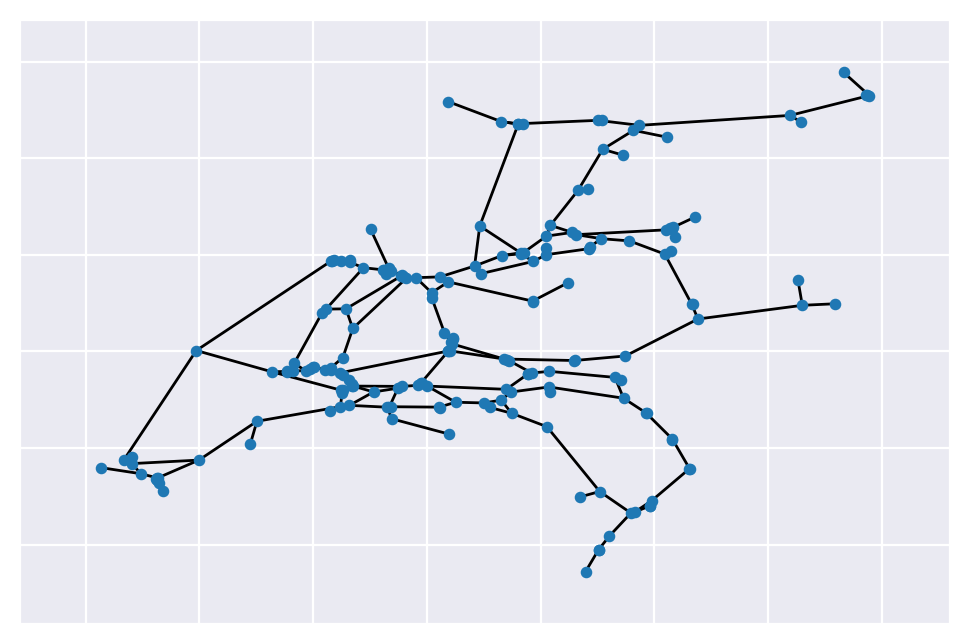

In [10]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, keep, node_size=10)

In [11]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')


# add degree to dataframes
df_links['degree_source'] = df_links.source.apply(lambda x: G.degree[x])
df_links['degree_target'] = df_links.source.apply(lambda x: G.degree[x])
df_nodes['degree'] = G.degree
df_nodes['degree'] = df_nodes.degree.apply(lambda x: x[1])

In [12]:
df_links

,source,target,CoupledDepth,GeoType,Id_navigability,SeaFairingDepth,CoupledLength,Code,SeaFairingLength,length_deg,...,geometry,WidePushedDepth,subgraph,PushedWidth,length,PushedDepth,GeneralDepth,Wkt,degree_source,degree_target
0,8867910,8865449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
1,8867910,8864151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
2,8867910,8863019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,8863966,8862419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,8862614,8867785,NaN,section,29513518.0,NaN,NaN,VI_C,NaN,NaN,...,"{'type': 'LineString', 'coordinates': ((3.7035...",NaN,0.0,NaN,0.041022,NaN,NaN,"LINESTRING (3.70357253511421 51.4196409141243,...",3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,22638146,8865631,NaN,section,25487763.0,NaN,NaN,V_A,NaN,NaN,...,"{'type': 'LineString', 'coordinates': ((5.4449...",NaN,0.0,NaN,0.002240,NaN,NaN,"LINESTRING (5.44495146786188 51.8840096454633,...",1,1
213,8860732,8865846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
214,8864319,8864929,NaN,section,52183.0,NaN,NaN,V_A,NaN,NaN,...,"{'type': 'LineString', 'coordinates': ((5.8969...",3.0,0.0,13.5,0.018738,3.0,3.0,"LINESTRING (5.89694167558212 51.1638894365466,...",3,3
215,8867901,8867258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3


In [21]:
df_links['splitted'] = 0
# find the longest link source and origin
source = df_links.loc[df_links.length_m == max(df_links.length_m)].source.values[0]
target = df_links.loc[df_links.length_m == max(df_links.length_m)].target.values[0]
# corresponding nodes
df_l = df_nodes.loc[df_nodes.n.isin([source,target])]

split_in = df_l.splitted
#find new X and Y positions
x_set = np.linspace(df_l.X.min(), df_l.X.max(), split_in)
y_set = np.linspace(df_l.Y.min(), df_l.Y.max(), split_in)



,n,X,Y,geometry,Wkt,degree
8862614,8862614,3.668687,51.439072,"{'type': 'Point', 'coordinates': (3.6686865135...",POINT (3.6686865135070996 51.4390721874277972),3
8860852,8860852,3.986799,52.004981,"{'type': 'Point', 'coordinates': (3.9867986721...",POINT (3.9867986721212598 52.0049805545477994),3


In [19]:
source.values[0]

'8862614'

In [22]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])